In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
import copy
import time
import math
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction
from math import factorial
from google.colab import files
import csv

In [ ]:
t0 = 10000
INF = 1000000

In [ ]:
def A(x: list):
    n = len(x)
    ind1 = random.randint(1, n - 1)
    ind2 = random.randint(1, n - 1)
    while (ind2 == ind1):
        ind2 = random.randint(1, n - 1)
    
    ans = x.copy()

    ans[ind1], ans[ind2] = ans[ind2], ans[ind1]
    return ans

In [ ]:
def get_coast(g: list, path: list):
    ans = 0
    for i in range(1, len(path)):
        ans += g[path[i - 1]][path[i]]

    return ans

In [ ]:
def simulated_annealing(n: int, g: list, p = 0.8, vis = True):

    x = list(range(n)) + [0]

    old_coast = get_coast(g, x) 
    evolution_of_coasts = []
    for i in range(1, 1000000):
        t = 100000/ np.log(1 + i)
        x_new = A(x)

        new_coast = get_coast(g, x_new)
        evolution_of_coasts.append(new_coast)

        if (new_coast - old_coast < 0 or math.exp(-(new_coast - old_coast) / t) <= p):
            x = x_new.copy()
    if (vis):
        plt.plot(evolution_of_coasts[:50])
        plt.title('Зависимость длины маршрута от номера итерации на алгоритме отжига')
        plt.xlabel('номер итерации')
        plt.ylabel('длина маршрута')
    return [[el + 1 for el in x], get_coast(g, x)]

In [ ]:
def AS(n: int, g: list, alpha = 1, beta = 2, p = 0.1, Q = 100, ant_count = 15, iter = 2000, vis = True):

    ph = np.full((n, n ), Q / (iter * n))
    INF = 1000000000

    inverted_g = np.zeros(n ** 2).reshape(n, n)
    ant_route = np.zeros((ant_count, n))
    ant_dist = np.zeros(ant_count)
    best_dist = np.zeros(iter)
    
    len_best_dist = INF
    route = np.zeros(n)
    perm = random.permutation(n)
    p = np.zeros(n)
    
    for i in range(n):
        for j in range(n):
            if (i != j):
                inverted_g[i][j] = 1 / g[i][j]
            
    paths = []
    evolution_of_coasts = []
    for cur_iter in range(iter):
        paths = []
        for k in range(ant_count): #идем по муравью
            cur_path = [random.randint(n)]

            for i in range(n): #сейчас добавляем iый город в маршрут
                unvisited = []
                for city in range(n):
                    if city not in cur_path:
                        unvisited.append(city)

                if (len(unvisited) == 1):
                    cur_path.append(unvisited[0])
                else:
                    prob= []
                    last_city = cur_path[-1]
                    for city in unvisited:
                        prob.append(ph[last_city][city] ** alpha * inverted_g[last_city][city] ** beta)
                    s = sum(prob)
                    for i in range(len(prob)):
                        prob[i] /= s
                    for i in range(1, len(prob)):
                        prob[i] += prob[i - 1]
                    cur_city = random.random()
                    for i in range(len(prob)):
                        if (cur_city <= prob[i]):
                            cur_path.append(unvisited[i])
                            break
            
            cur_path.append(cur_path[0])

            paths.append(cur_path)
            ans_coasts = [get_coast(g, p) for p in paths]
            evolution_of_coasts.append(min(ans_coasts))
        ph = (1 - p) * ph    
        for i in range(ant_count):
            for j in range(n - 1):
            
                ph[paths[i][j]][paths[i][j + 1]] += 1/g[paths[i][j]][paths[i][j + 1]]
    ans_coasts = [get_coast(g, p) for p in paths]

    if (vis):
        plt.plot(evolution_of_coasts[:50])
        plt.title('Зависимость длины маршрута от номера итерации на алгоритме муравьиной колонии')
        plt.xlabel('номер итерации')
        plt.ylabel('длина маршрута')
    return [paths[argmin(ans_coasts)], min(ans_coasts)]



# Тесты

In [ ]:
test1 = [
         [INF, 15, 9, 3, 6],
         [15, INF, 8, 4, 5],
         [9, 8, INF, 14, 12],
         [3, 4, 14, INF, 6],
         [6, 5, 12, 6, INF]
]
best_path = [1, 3, 2, 5, 4, 1]

Удачный путь 1-3-4-2-5-1, его стоимость 38


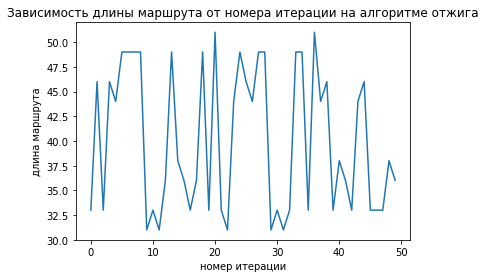

In [ ]:
ans = simulated_annealing(5, test1)
print(f'Удачный путь {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')

In [ ]:
ans = AS(5, test1)
print(f'Удачный путь {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')

NameError: ignored

Удачный путь 1-2-5-4-3-1, его стоимость 38


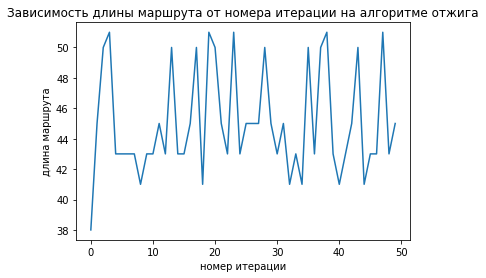

In [ ]:
test2 = [
         [INF, 6, 10, 14, 6],
         [6, INF, 15, 11, 8],
         [10, 15, INF, 10, 12],
         [14, 11, 10, INF, 4],
         [6, 8, 12, 4, INF]
]
t0 = time.time()
ans = simulated_annealing(len(test2), test2)   
print(f'Удачный путь {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')


Удачный путь 0-1-4-3-2-0, его стоимость 38


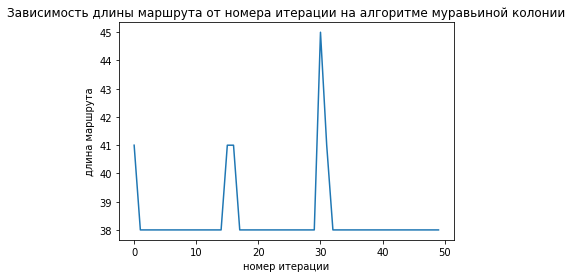

In [ ]:
ans=  AS(len(test2), test2)   
print(f'Удачный путь {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')

In [ ]:
test3 = gen_random(30, 1, 12)

In [ ]:
test3 = clear(test3)

Удачный путь 1-11-27-29-8-9-24-21-14-5-17-28-7-2-6-13-18-22-10-3-19-4-12-25-26-20-15-16-30-23-1, его стоимость 142


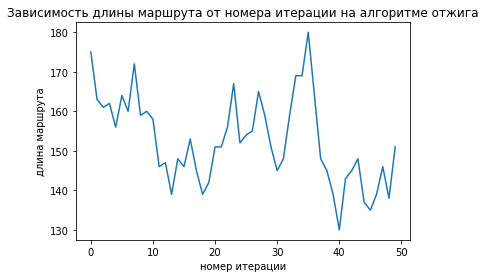

In [ ]:
ans = simulated_annealing(len(test3), test3)
print(f'Удачный путь {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')

Удачный путь 19-18-17-2-23-8-29-22-6-10-13-4-3-21-28-5-25-16-14-26-15-27-9-11-24-0-12-1-7-20-19, его стоимость 40


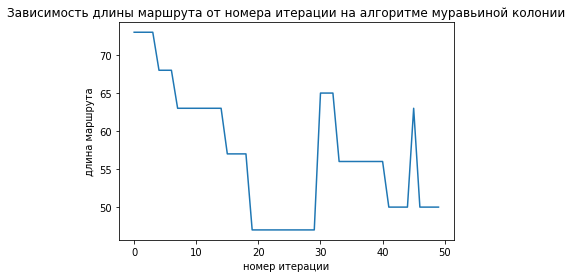

In [ ]:
ans = AS(len(test3), test3)
print(f'Удачный путь {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')